In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [19]:
employ = pd.read_csv("/Users/me./Desktop/Spring '22 /APP Analytics & P Modeling/Project/GetEmployedForum.csv")
# print(len(employ))
employ1 = employ.drop_duplicates() #drop duplicate rows
employ1 = employ1.replace(0, np.nan)
# employ1 = employ1.drop(columns = ['datePosted','pronoun','article','auxverb','adverb','conj','verb','adj','cogproc','informal'])

employ1 = employ1.dropna(axis = 0, thresh = 2, subset = ['posemo','negemo','anx','anger','sad','focuspast','focuspresent','focusfuture','work']) #drop rows where less than 2 columns are NaN values
df = employ1.replace(np.nan, 0) #return NaN as original 0 values 
# ndf = ndf.drop(columns = ['pronoun', 'article', 'auxverb', 'adverb', 'conj', 'verb', 'adj'])
df.head()

,CommentContent,score,datePosted,pronoun,article,auxverb,adverb,conj,verb,adj,...,negemo,anx,anger,sad,cogproc,focuspast,focuspresent,focusfuture,work,informal
0,that s actually 20 jobs in a month lol i didn ...,1.0,2/16/2022 23:41,13.16,7.89,5.26,2.63,0.00,10.53,2.63,...,0.00,0.0,0.0,0.00,7.89,2.63,10.53,0.00,7.89,5.26
1,yeahh the shining shimmering splendid that is ...,1.0,2/16/2022 23:40,13.79,10.34,10.34,0.00,0.00,20.69,3.45,...,3.45,0.0,0.0,3.45,3.45,3.45,13.79,0.00,10.34,0.00
2,thank you my friend i really appreciate it,1.0,2/16/2022 19:53,50.00,0.00,0.00,12.50,0.00,12.50,0.00,...,0.00,0.0,0.0,0.00,25.00,0.00,12.50,0.00,0.00,0.00
3,first of all congratulations we all know how h...,1.0,2/16/2022 18:58,21.88,0.00,6.25,9.38,6.25,25.00,6.25,...,0.00,0.0,0.0,0.00,18.75,3.12,18.75,6.25,3.12,3.12
4,absolutely is a factor i had the same issue wh...,1.0,2/16/2022 16:03,5.88,13.73,9.80,5.88,3.92,19.61,5.88,...,0.00,0.0,0.0,0.00,7.84,5.88,11.76,1.96,5.88,1.96


# Get Word Count per Comment 

In [367]:
#get sample 10%
ndf = df
# ndf['commentstr'] = ndf['CommentContent'].tolist()

In [368]:
#create new row include the number of words in the comment
ndf.reset_index(inplace = True, drop=True)
ndf['wordcount'] = ndf['CommentContent'].str.count(' ')
ndf['CommentContent']
len(ndf)


47580

In [354]:
# ndf = ndf.drop(labels = 0, axis = 0)
# ndf.reset_index(inplace = True, drop = True) 
# ndf.head(5)

In [369]:
comment = ndf['CommentContent']
norm = []
weird = []
i = 0
#remove comments with random words that dont make sense
while i in range(len(ndf)):
    ncom = comment[i].lower().split(' ')
    for x in ncom: 
        if len(x) <= 15:
            norm.append(x)
        else: 
            weird.append(x)
    # print(i, weird, len(weird))
    if len(weird) >= 1:
        ndf = ndf.drop(labels= i, axis =0)
        ndf.reset_index(inplace = True, drop = True)
    i += 1
    norm.clear()
    weird.clear()
ndf


,CommentContent,score,datePosted,pronoun,article,auxverb,adverb,conj,verb,adj,...,anx,anger,sad,cogproc,focuspast,focuspresent,focusfuture,work,informal,wordcount
0,that s actually 20 jobs in a month lol i didn ...,1.0,2/16/2022 23:41,13.16,7.89,5.26,2.63,0.00,10.53,2.63,...,0.0,0.00,0.00,7.89,2.63,10.53,0.00,7.89,5.26,38
1,yeahh the shining shimmering splendid that is ...,1.0,2/16/2022 23:40,13.79,10.34,10.34,0.00,0.00,20.69,3.45,...,0.0,0.00,3.45,3.45,3.45,13.79,0.00,10.34,0.00,29
2,thank you my friend i really appreciate it,1.0,2/16/2022 19:53,50.00,0.00,0.00,12.50,0.00,12.50,0.00,...,0.0,0.00,0.00,25.00,0.00,12.50,0.00,0.00,0.00,8
3,first of all congratulations we all know how h...,1.0,2/16/2022 18:58,21.88,0.00,6.25,9.38,6.25,25.00,6.25,...,0.0,0.00,0.00,18.75,3.12,18.75,6.25,3.12,3.12,32
4,absolutely is a factor i had the same issue wh...,1.0,2/16/2022 16:03,5.88,13.73,9.80,5.88,3.92,19.61,5.88,...,0.0,0.00,0.00,7.84,5.88,11.76,1.96,5.88,1.96,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46023,i m not sure exactly the direction of this sub...,3.0,6/13/2012 16:25,19.05,9.52,11.90,4.76,7.14,21.43,4.76,...,0.0,0.00,0.00,23.81,2.38,14.29,0.00,2.38,0.00,42
46024,i literally can t do anything and this is how ...,7.0,6/13/2012 16:13,33.33,0.00,20.00,6.67,13.33,20.00,0.00,...,0.0,0.00,0.00,20.00,0.00,26.67,0.00,6.67,0.00,15
46025,i d like to counter this two years out of coll...,15.0,6/13/2012 16:02,9.93,3.97,10.60,4.64,6.62,13.25,7.28,...,0.0,0.00,0.00,9.93,0.66,10.60,1.32,8.61,0.66,151
46026,i can attest to this i make a fuck ton of mone...,6.0,6/13/2012 15:41,21.05,5.26,15.79,0.00,5.26,21.05,0.00,...,0.0,5.26,0.00,10.53,10.53,15.79,0.00,0.00,5.26,18


[Text(0, 0, '(-33, -28]'),
 Text(1, 0, '(-28, -23]'),
 Text(2, 0, '(-23, -18]'),
 Text(3, 0, '(-18, -13]'),
 Text(4, 0, '(-13, -8]'),
 Text(5, 0, '(-8, -3]'),
 Text(6, 0, '(-3, 2]'),
 Text(7, 0, '(2, 7]'),
 Text(8, 0, '(7, 12]'),
 Text(9, 0, '(12, 17]'),
 Text(10, 0, '(17, 22]'),
 Text(11, 0, '(22, 27]'),
 Text(12, 0, '(27, 32]'),
 Text(13, 0, '(32, 37]'),
 Text(14, 0, '(37, 42]'),
 Text(15, 0, '(42, 47]'),
 Text(16, 0, '(47, 52]'),
 Text(17, 0, '(52, 57]'),
 Text(18, 0, '(57, 62]'),
 Text(19, 0, '(62, 67]')]

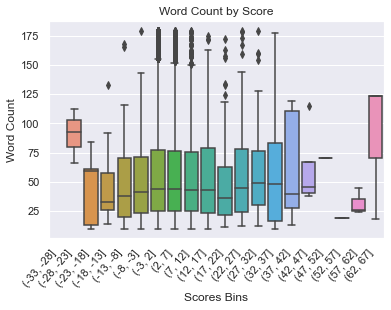

In [372]:
#remove comments with less than 10 words 
ndf = ndf.loc[ndf['wordcount'] >= 10]
ndf = ndf.loc[ndf['wordcount'] < 180]

'''create histogram''' 
# bin = ((ndf['score'].max())-(ndf['score'].min()))//6
# abs_freq, intervals = np.histogram(ndf['score'], bins = 24)
# fdist = pd.DataFrame(index = np.linspace(1,24,24) , columns = ['start', 'end', 'class_mark', 'abs_freq'])
# fdist['start'] = intervals[:-1]
# fdist['end'] = intervals[1:]
# fdist['class_mark'] = (fdist['start'] + fdist['end'])/2
# fdist['abs_freq'] = abs_freq
# fdist
max = ndf['score'].max()
min = ndf['score'].min()
ndf['Scores'] = pd.cut(df['score'], bins = range(int(min),int(max)+1, 5))
# fig, ax= plt.subplots(2,2, figsize = (15,8))
# ax = ax.flatten()
# sns.stripplot(x = 'bin', y = 'wordcount', data = ndf, ax=ax[0])
# sns.violinplot(x = 'bin', y = 'wordcount', data = ndf, ax=ax[1])
# sns.boxplot(x = 'bin', y = 'wordcount', data = ndf, ax=ax[2])
ax = sns.boxplot(x = 'Scores', y = 'wordcount', data = ndf)
ax.set(title = 'Word Count by Score', xlabel = 'Scores Bins', ylabel = 'Word Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50, ha = 'right')

In [373]:
ndf.corr()

,score,pronoun,article,auxverb,adverb,conj,verb,adj,posemo,negemo,anx,anger,sad,cogproc,focuspast,focuspresent,focusfuture,work,informal,wordcount
score,1.000000,-0.002426,0.019893,-0.008375,-0.010316,0.016213,-0.004684,0.019846,-0.031845,0.035352,0.014821,0.028230,0.007574,0.001048,0.001787,-0.010229,0.005392,0.000598,-0.019501,0.032201
pronoun,-0.002426,1.000000,-0.315073,0.114731,0.004272,-0.038304,0.255828,-0.127001,0.064780,0.034645,0.025382,0.009611,0.035659,0.119769,0.142956,0.157380,0.052219,-0.275047,-0.006029,-0.061418
article,0.019893,-0.315073,1.000000,-0.066347,-0.118484,-0.093609,-0.110567,0.008653,-0.068185,-0.034471,-0.028624,-0.015149,-0.032920,-0.131684,-0.003239,-0.128756,-0.037353,0.052757,-0.077603,0.045335
auxverb,-0.008375,0.114731,-0.066347,1.000000,-0.005039,-0.025719,0.555267,-0.017388,-0.053107,0.005056,0.008358,-0.016033,-0.005910,0.117400,0.079854,0.416947,0.137015,-0.068229,-0.047033,-0.044074
adverb,-0.010316,0.004272,-0.118484,-0.005039,1.000000,0.145534,0.017610,-0.034400,0.043654,0.032524,0.034990,0.017067,0.008166,0.123072,0.063664,0.008243,-0.000846,-0.119229,0.097474,-0.036986
conj,0.016213,-0.038304,-0.093609,-0.025719,0.145534,1.000000,-0.036079,0.069421,-0.067354,-0.010641,0.009699,-0.009529,-0.016772,0.171371,-0.010145,-0.005541,0.062805,-0.037764,-0.038951,0.131752
verb,-0.004684,0.255828,-0.110567,0.555267,0.017610,-0.036079,1.000000,-0.082619,0.055612,0.012737,0.003423,0.007366,0.016435,0.207963,0.236394,0.589651,0.204014,-0.178382,-0.026389,-0.099833
adj,0.019846,-0.127001,0.008653,-0.017388,-0.034400,0.069421,-0.082619,1.000000,0.185719,0.120696,0.034150,0.036917,0.082465,0.009477,-0.050677,-0.048647,-0.008954,-0.064996,0.010206,0.019561
posemo,-0.031845,0.064780,-0.068185,-0.053107,0.043654,-0.067354,0.055612,0.185719,1.000000,-0.059018,-0.014570,-0.035040,-0.020447,0.051075,-0.088099,0.083637,0.092084,-0.177669,0.186061,-0.138637
negemo,0.035352,0.034645,-0.034471,0.005056,0.032524,-0.010641,0.012737,0.120696,-0.059018,1.000000,0.444048,0.542469,0.476967,0.023555,0.006118,-0.007399,-0.004062,-0.146856,0.153261,-0.048444
